<a href="https://colab.research.google.com/github/Nbautista28/data-science/blob/main/Nelson_Bautista_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #allows google slides to work as your data set
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1b1BXjgv8C-TnOvDZf-DQpG2aQH03CHq_-tc44zzX7zQ/edit#slide=id.g1a6bea4532f_0_245"

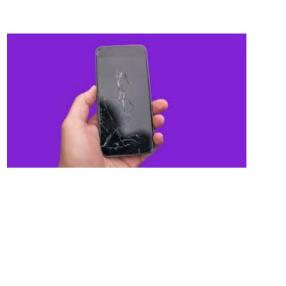

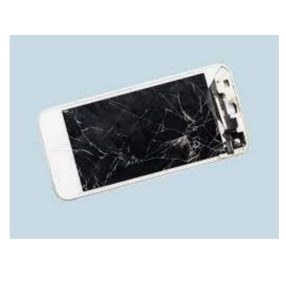

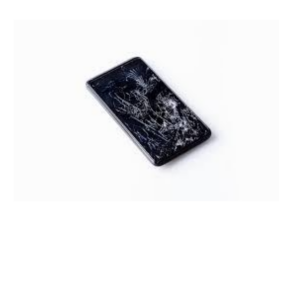

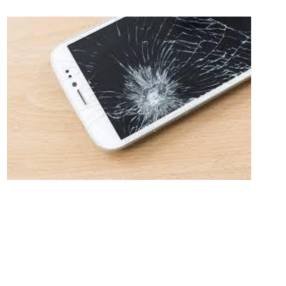

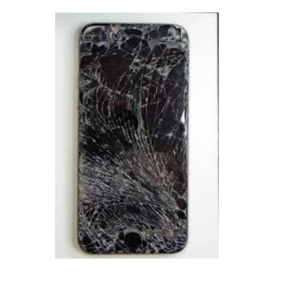

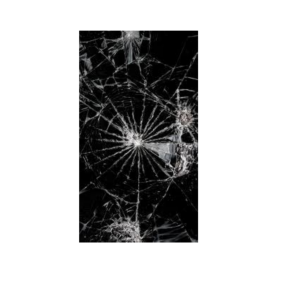

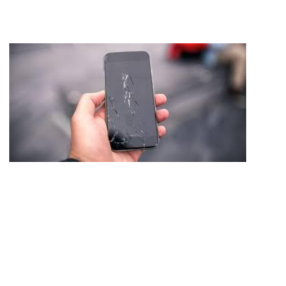

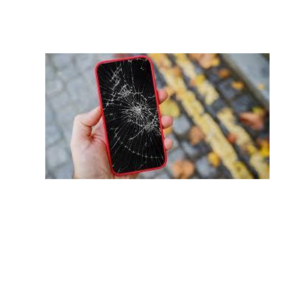

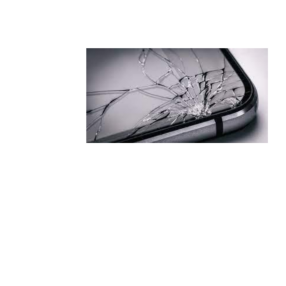

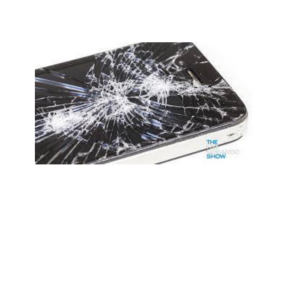

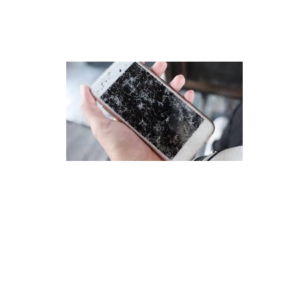

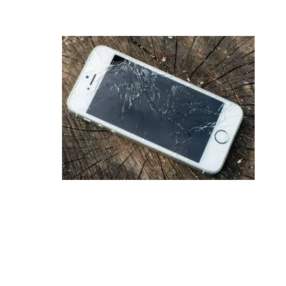

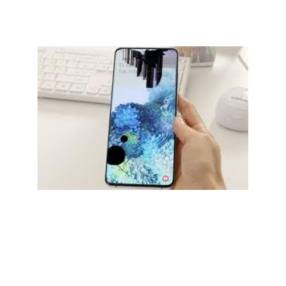

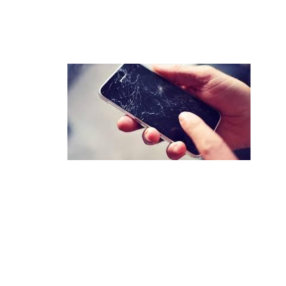

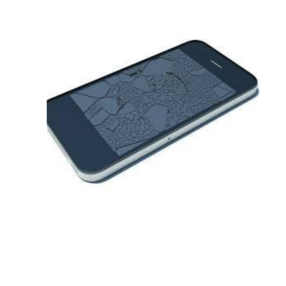

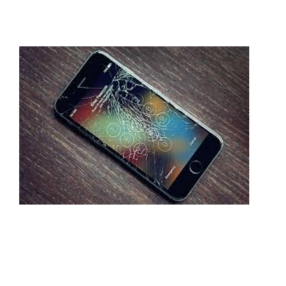

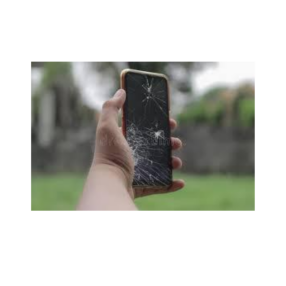

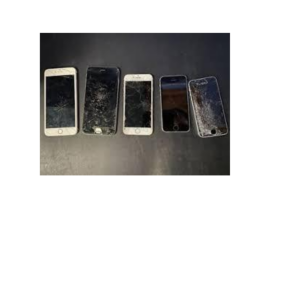

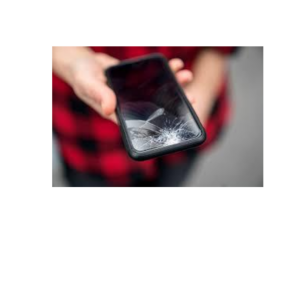

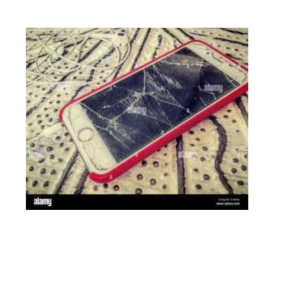

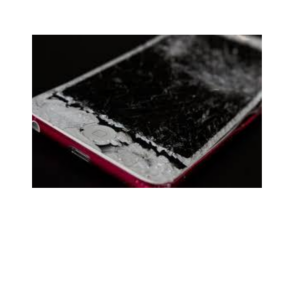

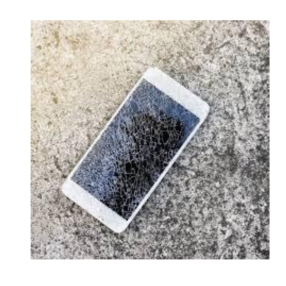

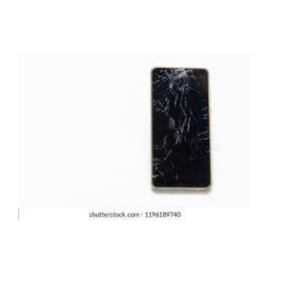

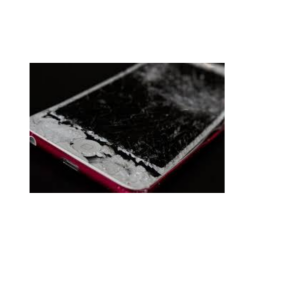

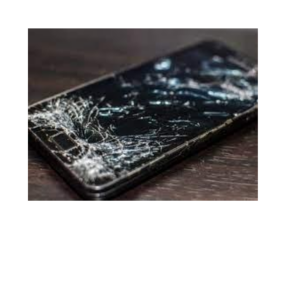

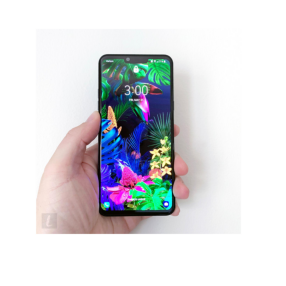

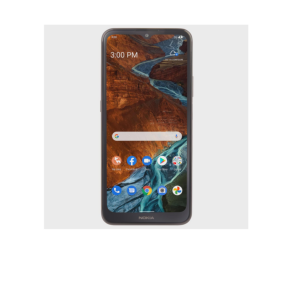

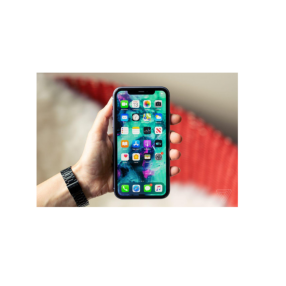

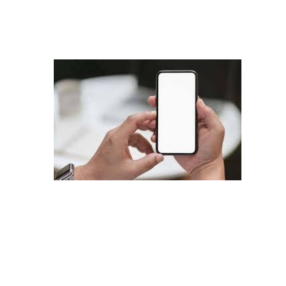

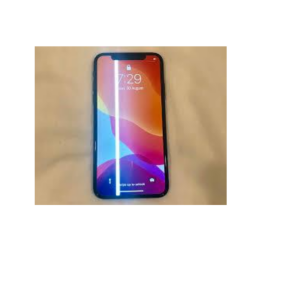

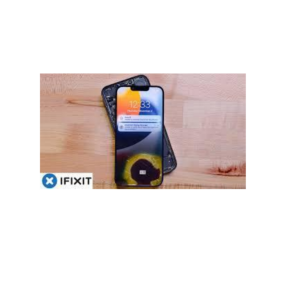

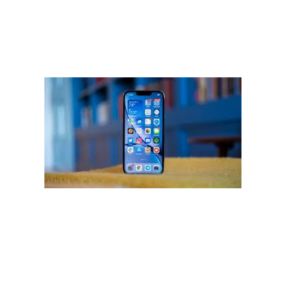

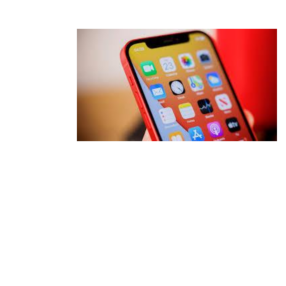

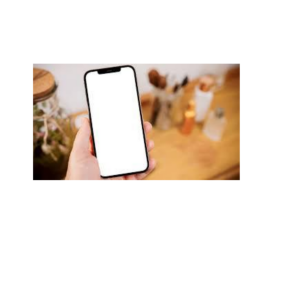

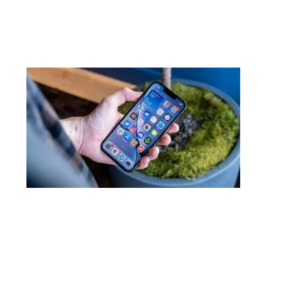

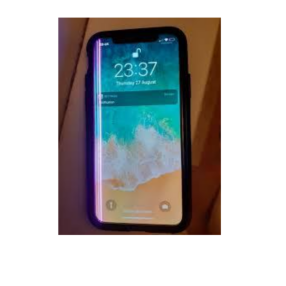

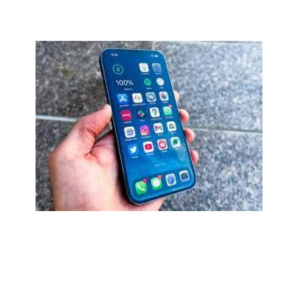

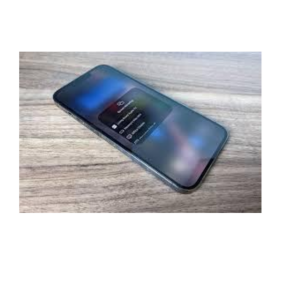

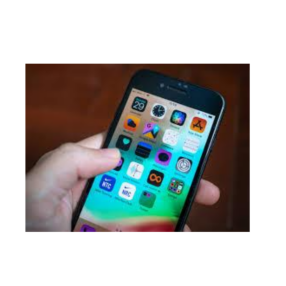

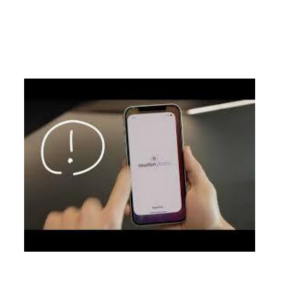

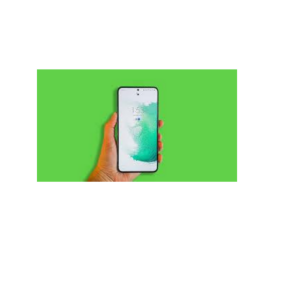

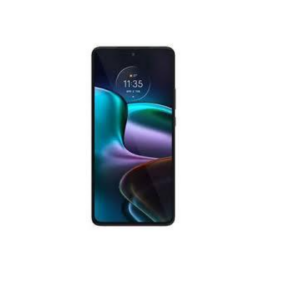

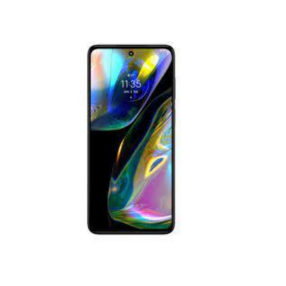

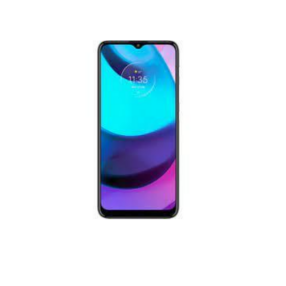

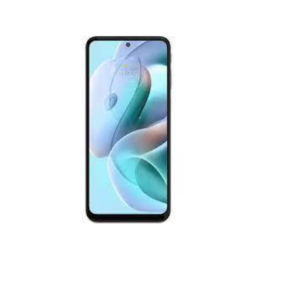

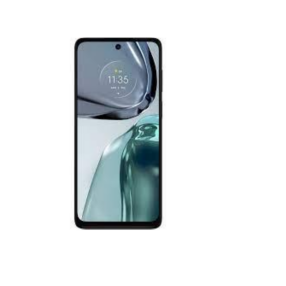

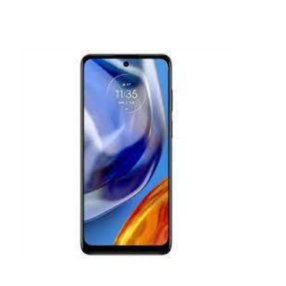

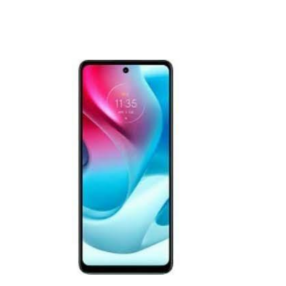

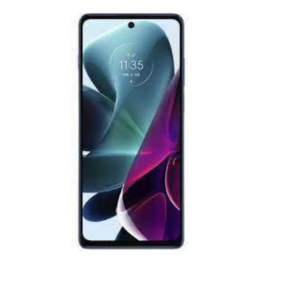

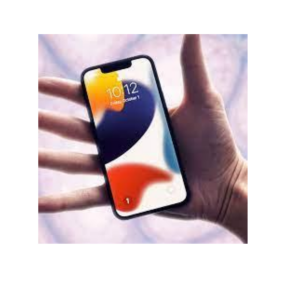

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-2.4967, -1.7572, -1.1537,  ..., -2.5293, -1.4832,  4.4017],
        [-2.7966, -6.0781, -2.3348,  ..., -4.8874,  0.5512,  2.9374],
        [-0.8961, -3.4173, -4.6524,  ..., -3.5172,  1.5633,  3.4576],
        ...,
        [-3.6132,  0.3202, -2.5075,  ..., -5.0389, -1.3935,  4.9370],
        [-1.9260, -1.4522, -0.9042,  ..., -4.9201, -0.9339,  4.0637],
        [-1.0289, -0.4263, -2.3377,  ..., -4.2467,  2.1835,  5.6193]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses): #tries to guess what each of the photos in the data are 
    print(labels[i])

web site, website, internet site, site
envelope
remote control, remote
paintbrush
wallet, billfold, notecase, pocketbook
book jacket, dust cover, dust jacket, dust wrapper
switch, electric switch, electrical switch
envelope
studio couch, day bed
book jacket, dust cover, dust jacket, dust wrapper
envelope
paintbrush
iPod
power drill
paintbrush
wallet, billfold, notecase, pocketbook
iPod
switch, electric switch, electrical switch
cleaver, meat cleaver, chopper
mousetrap
quill, quill pen
solar dish, solar collector, solar furnace
lighter, light, igniter, ignitor
binder, ring-binder
book jacket, dust cover, dust jacket, dust wrapper
cellular telephone, cellular phone, cellphone, cell, mobile phone
iPod
iPod
face powder
lighter, light, igniter, ignitor
mailbag, postbag
binder, ring-binder
binder, ring-binder
cleaver, meat cleaver, chopper
screen, CRT screen
iPod
iPod
lipstick, lip rouge
remote control, remote
analog clock
envelope
iPod
cellular telephone, cellular phone, cellphone, cell, mo

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

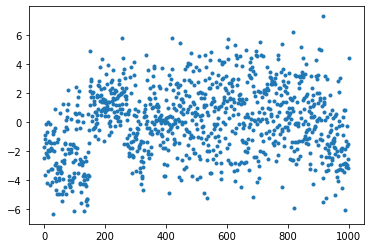

In [ ]:
plt.plot(X[0],'.') #represents each of the photos in the data

In [ ]:
X[0]

array([-2.49667430e+00, -1.75720119e+00, -1.15366733e+00, -3.65260887e+00,
       -8.68715465e-01, -1.30877525e-01, -2.15418935e+00, -1.47748971e+00,
       -2.27803850e+00, -6.87849998e-01, -4.21899939e+00, -3.37810421e+00,
       -2.41333771e+00, -1.20866746e-02, -1.96090984e+00, -1.34639919e+00,
       -1.34326649e+00, -1.99480474e+00, -1.38370767e-01, -1.90107036e+00,
       -4.33347034e+00, -3.24436498e+00, -1.84997869e+00, -1.45511484e+00,
       -1.78061569e+00, -1.91388631e+00, -3.24380350e+00, -4.12416649e+00,
       -8.13459635e-01, -6.40348315e-01, -6.33680105e+00, -1.98857510e+00,
       -1.45767868e+00, -5.92218399e-01, -4.26817536e-01, -2.95984983e+00,
        9.10006285e-01, -3.89362884e+00, -2.85834455e+00, -4.08248091e+00,
       -4.68897343e+00, -4.97319269e+00, -3.48281407e+00, -1.39001775e+00,
       -3.12530088e+00, -1.17136228e+00, -3.10771561e+00, -3.27377391e+00,
       -3.98637915e+00, -4.98497772e+00, -3.86036348e+00,  6.02859497e-01,
       -3.28915954e+00, -

In [ ]:
np.argmax(X[0])

916

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

web site, website, internet site, site
spotlight, spot
ballpoint, ballpoint pen, ballpen, Biro
pug, pug-dog
iPod
pencil sharpener
binder, ring-binder
screen, CRT screen
lighter, light, igniter, ignitor
switch, electric switch, electrical switch


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 17.,  61., 115., 160., 210., 205., 144.,  63.,  23.,   2.]),
 array([-6.336801 , -4.9739447, -3.611088 , -2.2482314, -0.8853749,
         0.4774816,  1.8403381,  3.2031946,  4.566051 ,  5.928908 ,
         7.2917643], dtype=float32),
 <a list of 10 Patch objects>)

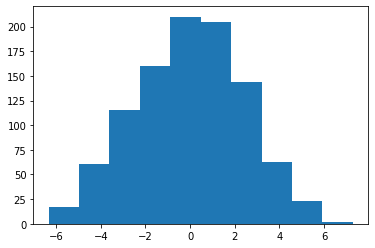

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x): #used to classify things 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #avoids extreme values 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #gets the batch of runs 
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots(): #have to get acess key in order for weights and biases to work 
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▅▃▃▁▅▇██████████████████████████████████
loss,▄▆▆█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc_train,0.9375
loss,0.37576


<ipython-input-139-9b084fa19081>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#run 1 = 1.00076 (worst)

#run 2 = 0.40701 (average)

#run 3 = 0.37576 (best)

https://tensorspace.org/